# loading data

In [7]:
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Gathering data


taking the data from the csv file

In [10]:
file1 = pd.read_csv('twitter-archive-enhanced.csv')

taking the data from the url using requests library then put it in dataframe

In [11]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
file2 = pd.read_csv('image-predictions.tsv', sep='\t' )

taking the data from twitter api  using the tweepy library

In [16]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
CONSUMER_KEY  = '5Uur0mo4ol2kB8yhtZ1VxXS0u'
CONSUMER_SECRET = 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH'
OAUTH_TOKEN = '303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB'
OAUTH_TOKEN_SECRET  = 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft'
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

putting a json file include the data within the tweet id in our file 

In [17]:
#https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api
list1 = []
for tweet_id in file1['tweet_id']:
    try :
        list1.append(api.get_status(tweet_id))
    except Exception as error: 
        continue


Rate limit reached. Sleeping for: 332
Rate limit reached. Sleeping for: 348


In [24]:
list1


[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},
      'large': {'w': 540, 'h': 528, 

saving it as json file

In [25]:
# https://docs.python.org/3/library/json.html
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list1))


making the dataframe

In [26]:
file_3 = []
with open('tweet_json.txt', encoding='utf-8') as json_file: 
    list1 = json.load(json_file)
    for i in list1 : 
        tweet_id = i['id']
        text = i['text']
        favourite_count = i['favorite_count']
        retweet_count = i['retweet_count']
        retweeted_status = i['retweeted_status'] = i.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            None
        else:
            retweeted_status = 'This is a retweet'
            
        #https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/#:~:text=To%20create%20DataFrame%20from%20dict,n%20is%20the%20array%20length.
        file_3.append({'tweet_id' : tweet_id, 'tweet_text' : text, 'favourite_count' : favourite_count,'retweet_count' :retweet_count,'retweeted_status':retweeted_status })
    file3 = pd.DataFrame(file_3,columns = ['tweet_id','tweet_text','favourite_count','retweet_count','retweeted_status'])
    

# Data assending

In [27]:
file1.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [28]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [29]:
file1.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [30]:
file2.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [31]:
file2.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [32]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
print(sum(file2.tweet_id.duplicated()))
print(sum(file2.jpg_url.duplicated()))
print(sum(file2.img_num.duplicated()))

0
66
2071


In [34]:
print(file2.img_num.value_counts())
print(file2.p1.value_counts())
print(file2.p2.value_counts())
print(file2.p3.value_counts())
print(file2.p1_dog.value_counts)
print(file2.p2_dog.value_counts)
print(file2.p3_dog.value_counts)

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
Egyptian_cat            1
suit                    1
platypus                1
three-toed_sloth        1
Name: p1, Length: 378, dtype: int64
Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
giant_panda             1
water_bottle            1
ice_lolly               1
indri                   1
mashed_potato           1
Name: p2, Length: 405, dtype: int64
Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
coffeepot              1
barbell                1
theater_curtain        1
tripod                 1
zebra                  1
Name: p3, Len

In [35]:
file1_copy = file1.copy()
file2_copy = file2.copy()
file3_copy = file3.copy()

In [36]:
file3.info();
file3.retweeted_status.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   int64 
 1   tweet_text        2331 non-null   object
 2   favourite_count   2331 non-null   int64 
 3   retweet_count     2331 non-null   int64 
 4   retweeted_status  2331 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.2+ KB


Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

   ### quality issues: 
   1 - file1 timestamp change it from object to timestamp 
   
   2 - melt the columns doggo floofer pupper puppo into one coloumn called dog type
   
   3 - making the rating_numerator for the people of puts fractions in rating
   
   4 - fixing the rating of the rating_denominator not equal 10
   
   5-  solving the problem of some rating are above 10
   
   6- drop usless columns
   
   7  file2 drop duplicated images
   
   8 - remove retweeted tweets from json file
   

### Tidness : 
1 - making column named rating divide numerator on denumrator

2 - merging the files and drop dublicated

# Data cleaning 

##### QUALITY


### define
1 - file1 timestamp change it from object to timestamp 

### code

In [65]:
file1_copy['timestamp'] = pd.to_datetime(file1_copy['timestamp'])

### test

In [38]:
file1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### define
2 - melt the columns doggo	floofer	pupper	puppo into one coloumn called dog tupe

### code

In [39]:
file1_copy = pd.melt(file1, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp'
                                , 'source','text','retweeted_status_id','retweeted_status_user_id',
                               'retweeted_status_timestamp','expanded_urls','rating_numerator',
                               'rating_denominator','name'], var_name='dog',value_name= 'dog_type')
file1_copy.drop('dog',axis = 1,inplace = True)
file1_copy.sort_values('dog_type',ascending=False,inplace = True)
file1_copy.drop_duplicates(subset= 'tweet_id',keep = 'first',inplace = True)
file1_copy = file1_copy.reset_index()


### test

In [40]:
file1_copy.dog_type.value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_type, dtype: int64

### define
3 - making the rating_numerator for the people of puts fractions in rating

### code

In [41]:
file1_copy.rating_numerator = file1_copy.rating_numerator.astype('float64')

### test

In [42]:
file1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       2356 non-null   int64  
 1   tweet_id                    2356 non-null   int64  
 2   in_reply_to_status_id       78 non-null     float64
 3   in_reply_to_user_id         78 non-null     float64
 4   timestamp                   2356 non-null   object 
 5   source                      2356 non-null   object 
 6   text                        2356 non-null   object 
 7   retweeted_status_id         181 non-null    float64
 8   retweeted_status_user_id    181 non-null    float64
 9   retweeted_status_timestamp  181 non-null    object 
 10  expanded_urls               2297 non-null   object 
 11  rating_numerator            2356 non-null   float64
 12  rating_denominator          2356 non-null   int64  
 13  name                        2356 

### define
4 - fixing the rating of the rating_denominator not equal 10   


### code 

In [43]:
for i in range(file1_copy.shape[0]):
    if (file1_copy.loc[i,'rating_denominator'] != 10):
        try : 
            file1_copy.loc[i,'rating_numerator'] = (float(file1_copy.loc[i,'rating_numerator']) / float(file1_copy.loc[i,'rating_denominator'])*10)
        except ZeroDivisionError : 
            file1_copy.loc[i,'rating_numerator'] = 10
file1_copy['rating_denominator'] = 10



### test

In [44]:
file1_copy.rating_denominator.describe()

count    2356.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

### define
5- solving the problem of some rating are above 10 

### code

In [45]:
for i in range(file1_copy.shape[0]):
    if (file1_copy.loc[i,'rating_numerator'] > 10 ):
        file1_copy.loc[i,'rating_numerator'] = 10

### test

In [46]:
file1_copy.rating_numerator.describe()

count    2356.000000
mean        9.467768
std         1.441802
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: rating_numerator, dtype: float64

### define
6 - drop useless columns 


### code 

In [47]:
file1_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'
                ,'expanded_urls','source','index'],axis = 1 , inplace = True)

### test

In [48]:
file1_copy.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_type'],
      dtype='object')

### define
7 - remove duplicated images in file2


### code

In [49]:
file2_copy.jpg_url.drop_duplicates(inplace = True)

### test

In [50]:
sum(file2_copy.jpg_url.duplicated())

0

### define
remove retweeted tweets from json file 


### code

In [51]:
file3_copy.query('retweeted_status == "Original tweet"',inplace = True)
        

### test

In [52]:
file3_copy.retweeted_status.value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

## tidness


### define
making the rating column 


### code

In [53]:
file1_copy['Rating'] = file1_copy['rating_numerator'] / file1_copy['rating_denominator']
file1_copy.drop(['rating_numerator','rating_denominator'],axis = 1 ,inplace = True)

### test

In [54]:
file1.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
940   753026973505581056                    NaN                  NaN   
408   823581115634085888                    NaN                  NaN   
1574  687480748861947905                    NaN                  NaN   
1516  690959652130045952                    NaN                  NaN   
1802  676949632774234114                    NaN                  NaN   

                      timestamp  \
940   2016-07-13 00:43:15 +0000   
408   2017-01-23 17:20:14 +0000   
1574  2016-01-14 03:45:57 +0000   
1516  2016-01-23 18:09:53 +0000   
1802  2015-12-16 02:19:04 +0000   

                                                 source  \
940   <a href="http://twitter.com/download/iphone" r...   
408   <a href="http://twitter.com/download/iphone" r...   
1574  <a href="http://twitter.com/download/iphone" r...   
1516  <a href="http://twitter.com/download/iphone" r...   
1802  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
940   Say hello to Tayzie. She's a Barbadian Bugaboo...                  NaN   
408   This is Crawford. He's quite h*ckin good at th...                  NaN   
1574  Another magnificent photo. 12/10 https://t.co/...                  NaN   
1516  This golden is happy to refute the soft mouth ...                  NaN   
1802  This is Tyrus. He's a Speckled Centennial Tico...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
940                        NaN                        NaN   
408                        NaN                        NaN   
1574                       NaN                        NaN   
1516                       NaN                        NaN   
1802                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
940   https://twitter.com/dog_rates/status/753026973...                10   
408   https://twitter.com/dog_rates/status/823581115...                11   
1574  https://twitter.com/dog_rates/status/687480748...                12   
1516  https://twitter.com/dog_rates/status/690959652...                11   
1802  https://twitter.com/dog_rates/status/676949632...                 8   

      rating_denominator      name doggo floofer pupper puppo  
940                   10    Tayzie  None    None   None  None  
408                   10  Crawford  None    None   None  None  
1574                  10      None  None    None   None  None  
1516                  10      None  None    None   None  None  
1802                  10     Tyrus  None    None   None  None

### define
merging the 2 files i got 

### code

In [66]:
file4 = pd.merge(file1_copy,file2_copy , how = 'left', on = ['tweet_id']) 
file = pd.merge(file4,file3_copy, how = 'left', on = ['tweet_id'])

### test

In [67]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2356 non-null   int64              
 1   timestamp         2356 non-null   datetime64[ns, UTC]
 2   text              2356 non-null   object             
 3   name              2356 non-null   object             
 4   dog_type          2356 non-null   object             
 5   Rating            2356 non-null   float64            
 6   jpg_url           2075 non-null   object             
 7   img_num           2075 non-null   float64            
 8   p1                2075 non-null   object             
 9   p1_conf           2075 non-null   float64            
 10  p1_dog            2075 non-null   object             
 11  p2                2075 non-null   object             
 12  p2_conf           2075 non-null   float64            
 13  p2_

# saving the csv file

In [68]:
file.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [69]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2356 non-null   int64              
 1   timestamp         2356 non-null   datetime64[ns, UTC]
 2   text              2356 non-null   object             
 3   name              2356 non-null   object             
 4   dog_type          2356 non-null   object             
 5   Rating            2356 non-null   float64            
 6   jpg_url           2075 non-null   object             
 7   img_num           2075 non-null   float64            
 8   p1                2075 non-null   object             
 9   p1_conf           2075 non-null   float64            
 10  p1_dog            2075 non-null   object             
 11  p2                2075 non-null   object             
 12  p2_conf           2075 non-null   float64            
 13  p2_

### visaulizing data 


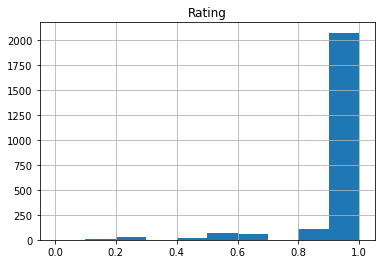

In [60]:
file.hist(column='Rating');

Text(0.5, 1.0, 'retweet counts v rating')

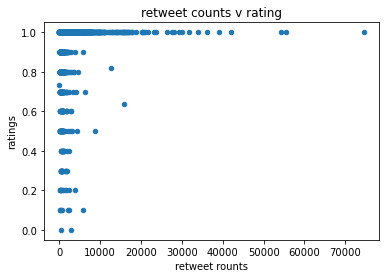

In [61]:
file.plot(x = 'retweet_count', y  = 'Rating',kind = 'scatter')
plt.xlabel('retweet rounts')
plt.ylabel('ratings')
plt.title('retweet counts v rating')

(0.0, 40000.0)

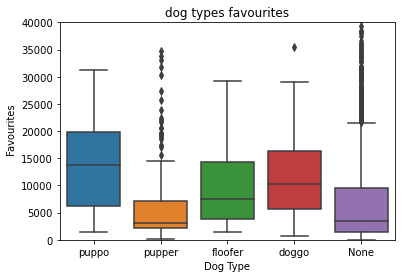

In [62]:
sns.boxplot(x='dog_type', y='favourite_count', data=file)
plt.title('dog types favourites')
plt.xlabel('Dog Type')
plt.ylabel(' Favourites')
plt.ylim(0,40000)

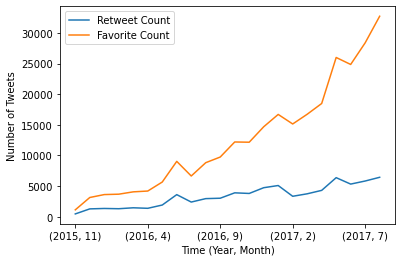

In [73]:
file.retweet_count.groupby([file['timestamp'].dt.year, file['timestamp'].dt.month]).mean().plot(kind = 'line')
file.favourite_count.groupby([file['timestamp'].dt.year, file['timestamp'].dt.month]).mean().plot(kind = 'line')
plt.ylabel('Number of Tweets')
plt.xlabel('Time (Year, Month)')
plt.legend(('Retweet Count', 'Favorite Count'))
